In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN

DATAPATH = "../dataframes/experiment3/MG_3_components_3.csv"

df = pd.read_csv(DATAPATH, index_col=0)
df = df.loc[(df["split"] == "test") & (~df["faint"])]
X_test = df.iloc[:, -99:]
X_test.shape

(14260, 99)

In [136]:
hdb = HDBSCAN(min_cluster_size=100, n_jobs=-1)
cluster = hdb.fit_predict(X_test)
X_test["cluster"] = cluster

In [137]:
X_test["cluster"].value_counts()

cluster
 14    4607
 10    2987
-1     1189
 11     868
 4      857
 13     810
 5      560
 7      455
 3      373
 1      307
 0      299
 12     212
 2      212
 9      206
 6      160
 8      158
Name: count, dtype: int64

In [138]:
from sklearn.manifold import TSNE

In [139]:
X_test_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(X_test.iloc[:, :-1])
X_test_embedded = pd.DataFrame(X_test_embedded, columns=["x1", "x2"])
X_test_embedded["cluster"] = cluster
X_test_embedded["cluster"] = X_test_embedded["cluster"].astype(str)

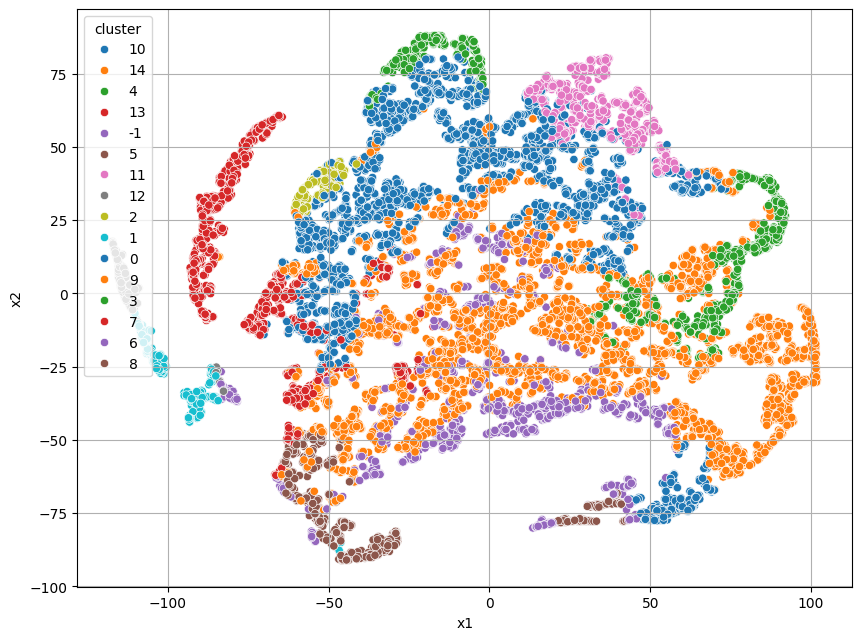

In [143]:
import matplotlib.pyplot as plt

# plt.figure()
# plt.scatter(X_test_embedded[:,0], X_test_embedded[:,1], c=cluster, alpha=0.5)
# plt.legend()
# plt.show()
import seaborn as sns

plt.figure(figsize=(10,7.5))
sns.scatterplot(data=X_test_embedded, x="x1", y="x2", hue="cluster", palette="tab10")
plt.grid(True)

In [141]:
X_test.loc[X_test["cluster"] == 2].describe()

,percentile_1,percentile_2,percentile_3,percentile_4,percentile_5,percentile_6,percentile_7,percentile_8,percentile_9,percentile_10,percentile_11,percentile_12,percentile_13,percentile_14,percentile_15,percentile_16,percentile_17,percentile_18,percentile_19,percentile_20,percentile_21,percentile_22,percentile_23,percentile_24,percentile_25,percentile_26,percentile_27,percentile_28,percentile_29,percentile_30,percentile_31,percentile_32,percentile_33,percentile_34,percentile_35,percentile_36,percentile_37,percentile_38,percentile_39,percentile_40,...,percentile_61,percentile_62,percentile_63,percentile_64,percentile_65,percentile_66,percentile_67,percentile_68,percentile_69,percentile_70,percentile_71,percentile_72,percentile_73,percentile_74,percentile_75,percentile_76,percentile_77,percentile_78,percentile_79,percentile_80,percentile_81,percentile_82,percentile_83,percentile_84,percentile_85,percentile_86,percentile_87,percentile_88,percentile_89,percentile_90,percentile_91,percentile_92,percentile_93,percentile_94,percentile_95,percentile_96,percentile_97,percentile_98,percentile_99,cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,1.247782,1.269171,1.280099,1.287555,1.293293,1.298010,1.302047,1.305600,1.308788,1.311693,1.314370,1.316861,1.319196,1.321399,1.323489,1.325481,1.327388,1.329219,1.330983,1.332687,1.334338,1.335940,1.337499,1.339019,1.340503,1.341954,1.343375,1.344769,1.346139,1.347486,1.348811,1.350118,1.351408,1.352681,1.353940,1.355186,1.356419,1.357642,1.358855,1.360059,...,1.384886,1.386118,1.387361,1.388617,1.389888,1.391174,1.392477,1.393799,1.395142,1.396506,1.397895,1.399311,1.400755,1.402232,1.403743,1.405293,1.406885,1.408524,1.410215,1.411963,1.413777,1.415662,1.417631,1.419692,1.421862,1.424156,1.426597,1.429212,1.432038,1.435123,1.438536,1.442377,1.446801,1.452064,1.458646,1.467581,1.481587,1.508748,1.573109,2.0
std,0.038174,0.030369,0.027584,0.026207,0.025404,0.024882,0.024521,0.024259,0.024064,0.023917,0.023805,0.023719,0.023655,0.023607,0.023573,0.023551,0.023538,0.023534,0.023536,0.023546,0.023560,0.023580,0.023603,0.023631,0.023663,0.023698,0.023736,0.023777,0.023820,0.023866,0.023915,0.023966,0.024019,0.024074,0.024131,0.024190,0.024251,0.024314,0.024379,0.024446,...,0.026310,0.026426,0.026545,0.026668,0.026794,0.026925,0.027060,0.027199,0.027343,0.027492,0.027646,0.027807,0.027974,0.028148,0.028330,0.028521,0.028721,0.028931,0.029153,0.029388,0.029637,0.029904,0.030190,0.030498,0.030832,0.031198,0.031601,0.032051,0.032560,0.033144,0.033831,0.034659,0.035697,0.037069,0.039037,0.042225,0.048310,0.061360,0.083548,0.0
min,1.139550,1.178005,1.201850,1.218250,1.230022,1.238913,1.245966,1.251792,1.256757,1.261090,1.264944,1.268424,1.271604,1.274538,1.277269,1.279828,1.282241,1.284527,1.286703,1.288783,1.290778,1.292697,1.294549,1.296340,1.298077,1.299765,1.301408,1.303010,1.304575,1.306107,1.307608,1.309081,1.310332,1.311412,1.312478,1.313531,1.314574,1.315606,1.316630,1.317645,...,1.336419,1.337311,1.338210,1.339119,1.340038,1.340967,1.341909,1.342863,1.343832,1.344816,1.345818,1.346838,1.347879,1.348942,1.350030,1.351146,1.352291,1.353469,1.354684,1.355940,1.357241,1

In [158]:
from sklearn.decomposition import PCA

X_test_embedded = PCA(n_components=20).fit_transform(X_test.iloc[:, :-1])
hdb = HDBSCAN(min_cluster_size=50, n_jobs=-1)
cluster = hdb.fit_predict(X_test_embedded)

X_test_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(X_test_embedded)
X_test_embedded = pd.DataFrame(X_test_embedded, columns=["x1", "x2"])
X_test_embedded["cluster"] = cluster
X_test_embedded["cluster"] = X_test_embedded["cluster"].astype(str)

In [159]:
X_test_embedded["cluster"].value_counts()

cluster
-1    9037
6     1235
1     1063
5      871
9      505
7      392
8      375
2      227
10     211
3      144
4      128
0       72
Name: count, dtype: int64